In [1]:
import sys
sys.path.append('/Users/kkozhevnikova/Documents/NSC/')
import groups
from groups.GROUP_1 import *
#from GROUP_2 import *
#from GROUP_3 import *
#from GROUP_4 import *
import pandas as pd
import pymannkendall as mk
from groups.res_average_plot import res_average_plot
from groups.testing_on_data import testing

 

import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import locale
locale.setlocale(locale.LC_ALL, 'ru_RU.UTF-8')
import pymorphy3

from datetime import datetime
from matplotlib import pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, 'ru_RU')
import sys
sys.path.append('/Users/kkozhevnikova/Documents/NSC/')
from OMA_tools.io_data.operations import File, Table, Dict_Operations
 

prefix = 'C:/Users/EOKozhevnikova/Documents/Regions/Share/Data/'

/Users/kkozhevnikova/anaconda3/envs/py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
def main(filename):

    dict_data = File(filename).from_file(0, 0)
    dict_data_new = Dict_Operations(dict_data).replace_keys_in_dict(['All 18+', 'All 14-59', 'All 10-45', 'All 14-44',
                    'All 14-54', 'All 25-49', 'All 25-54', 'All 4-45', 'All 6-54', 'W 14-44', 'W 25-59'])
    df = Dict_Operations(dict_data_new).combine_dict_into_one_dataframe('Date')
    dates = list(df['Date'])
    dates_converted = []
    for i in dates:
        #Если архитектура ядра процессора Darvin (MacOS)
        if sys.platform == 'darwin':
            morph = pymorphy3.MorphAnalyzer(lang = 'ru')
            month, year = i.split(' ')
            p = morph.parse(month)[0]
            inflect_month_name = p.inflect({'gent'}).word
            dates_converted.append(datetime.strptime(f'{inflect_month_name} {year}', '%B %Y').strftime('%d.%m.%Y'))
        else:
            dates_converted.append(datetime.strptime(i, '%B %Y').strftime('%d.%m.%Y'))
    #Замена столбца дат на новый конвертированный столбец
    df['Date'] = df['Date'].replace(dates, dates_converted)
    df = df.rename(columns={'Date': 'Месяц'})
    #Изменение типа данных в столбцах
    for column in df.columns[1:]:
        df[column] = df[column].astype(float)
    df['Месяц'] = pd.to_datetime(df['Месяц'], format = '%d.%m.%Y')
    df = df.sort_values(by = 'Месяц')
    df.set_index('Месяц', inplace = True)

    
    #df_full = pd.read_csv('data/data_for_forecast.csv', sep=';') #передается файл с данными, по которым будет строиться прогноз
    #df_full['Месяц'] = pd.to_datetime(df_full['Месяц'], format='%d.%m.%Y')
    #df_full = df_full.sort_values(by = 'Месяц')
    #df_full.set_index('Месяц', inplace=True)
    #df = df_full.head(42)
    #test = df_full.tail(3)
    ##################################

    #df_list_1 = []
    #df_list_2 = []
    #df_list_3 = []
    df_list_4 = []


    for column in df.columns:
        time_series = pd.Series(df[column])
        lagged_series = time_series.shift(12)
        correlation = time_series.corr(lagged_series)
        trend_test_result = mk.original_test(time_series)
        if ((correlation >= 0.7) and trend_test_result.h == True):
            df_list_1.append(df[column])
        '''
            # Есть сезонность, есть тренд
        if ((correlation < 0.7) and trend_test_result.h == True):
            df_list_2.append(df[column])
            #Нет сезонности, есть тренд
        if ((correlation >= 0.7) and trend_test_result.h == False):
            df_list_3.append(df[column])
            #Есть сезонность, нет тренда
        if ((correlation < 0.7) and trend_test_result.h == False):
            df_list_4.append(df[column])
            # Нет сезонности, нет тренда
        '''

    #gr_1 = pd.DataFrame(df_list_1).T
    #gr_2 = pd.DataFrame(df_list_2).T
    #gr_3 = pd.DataFrame(df_list_3).T
    gr_4 = pd.DataFrame(df_list_4).T

    avg_forecasts = []
    '''
    if gr_1.empty == False:
        print('', 'Результаты работы различных методов для ТВ-каналов с сезонностью и трендом', sep='\n', end='\n\n')
        avg_forecast_1 = group_1(gr_1)
        res_average_plot(gr_1, avg_forecast_1, save_dir='RESULT/Сезонность и тренд')
        avg_forecasts.append(avg_forecast_1)
    
    if gr_2.empty == False:
        print('', 'Результаты работы различных методов для ТВ-каналов с трендом без сезонности', sep='\n', end='\n\n')
        avg_forecast_2 = group_2(gr_2)
        res_average_plot(gr_2, avg_forecast_2, save_dir='RESULT/Тренд без сезонности')
        avg_forecasts.append(avg_forecast_2)
       
    if gr_3.empty == False:
        print('', 'Результаты работы различных методов для ТВ-каналов с сезонностью и без тренда', sep='\n', end='\n\n')
        avg_forecast_3 = group_3(gr_3)
        res_average_plot(gr_3, avg_forecast_3, save_dir='RESULT/Сезонность без тренда')
        avg_forecasts.append(avg_forecast_3)
    '''
    if gr_4.empty == False:
        print('','Результаты работы различных методов для ТВ-каналов без сезонности и без тренда', sep='\n', end='\n\n')
        avg_forecast_4 = group_4(gr_4)
        res_average_plot(gr_4, avg_forecast_4, save_dir='RESULT/Без сезонности и без тренда')
        avg_forecasts.append(avg_forecast_4) 
    
    #general_df, error_t, MAE = testing(df, test, avg_forecast_1, avg_forecast_2, avg_forecast_4)
    general_df = testing(df, *avg_forecasts, *avg_forecasts)
    return general_df


Результаты работы различных методов для ТВ-каналов с сезонностью и трендом



/Users/kkozhevnikova/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kkozhevnikova/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kkozhevnikova/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kkozhevnikova/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kkozhevnikova/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/deprecation

РЕЗУЛЬТАТ РАБОТЫ ФУНКЦИИ ARIMA
Прогноз на 12 месяцев:
            ЗВЕЗДА (НОВОСИБИРСК) All 18+  РЕН ТВ (ЕКАТЕРИНБУРГ) All 18+  \
2025-01-01                        5.7072                         9.4531   
2025-02-01                        5.5671                        10.2027   
2025-03-01                        5.2821                        10.0624   
2025-04-01                        5.1575                        10.0379   
2025-05-01                        5.0084                        10.0413   
2025-06-01                        4.3467                        10.5467   
2025-07-01                        4.0480                        10.6457   
2025-08-01                        6.0048                        10.8954   
2025-09-01                        6.9643                        10.3320   
2025-10-01                        6.0108                        10.3250   
2025-11-01                        6.1880                        10.5770   
2025-12-01                        6.1322      

15:52:18 - cmdstanpy - INFO - Chain [1] start processing
15:52:18 - cmdstanpy - INFO - Chain [1] done processing
15:52:18 - cmdstanpy - INFO - Chain [1] start processing
15:52:18 - cmdstanpy - INFO - Chain [1] done processing
15:52:18 - cmdstanpy - INFO - Chain [1] start processing
15:52:18 - cmdstanpy - INFO - Chain [1] done processing
15:52:18 - cmdstanpy - INFO - Chain [1] start processing
15:52:18 - cmdstanpy - INFO - Chain [1] done processing
15:52:18 - cmdstanpy - INFO - Chain [1] start processing
15:52:18 - cmdstanpy - INFO - Chain [1] done processing
15:52:18 - cmdstanpy - INFO - Chain [1] start processing
15:52:18 - cmdstanpy - INFO - Chain [1] done processing
15:52:18 - cmdstanpy - INFO - Chain [1] start processing
15:52:18 - cmdstanpy - INFO - Chain [1] done processing
15:52:18 - cmdstanpy - INFO - Chain [1] start processing
15:52:19 - cmdstanpy - INFO - Chain [1] done processing
15:52:19 - cmdstanpy - INFO - Chain [1] start processing
15:52:19 - cmdstanpy - INFO - Chain [1]

РЕЗУЛЬТАТ РАБОТЫ ФУНКЦИИ PROPHET
Прогноз на 12 месяцев:
            ЗВЕЗДА (НОВОСИБИРСК) All 18+  РЕН ТВ (ЕКАТЕРИНБУРГ) All 18+  \
Месяц                                                                     
2025-02-01                        4.5595                         9.8956   
2025-03-01                        4.5620                        10.1730   
2025-04-01                        4.6034                        10.3793   
2025-05-01                        4.4348                         9.8449   
2025-06-01                        4.2610                        10.3922   
2025-07-01                        4.1935                        10.3792   
2025-08-01                        4.9193                        10.6252   
2025-09-01                        5.4553                        10.5866   
2025-10-01                        5.1989                        10.4714   
2025-11-01                        5.4229                        10.6867   
2025-12-01                        5.3724    

/Users/kkozhevnikova/Documents/NSC/groups/avg.py:11: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  avg_forecast = combined_forecasts.groupby(combined_forecasts.columns, axis=1).sum()



Усредненный прогноз по всем методам:
            ЗВЕЗДА (НОВОСИБИРСК) All 18+  РЕН ТВ (ЕКАТЕРИНБУРГ) All 18+  \
2025-01-01                        2.8621                         5.5646   
2025-02-01                        4.8953                        10.3670   
2025-03-01                        4.7040                        10.3814   
2025-04-01                        4.6939                        10.4747   
2025-05-01                        4.4961                        10.1718   
2025-06-01                        4.2288                        10.7284   
2025-07-01                        4.2655                        10.7927   
2025-08-01                        5.1987                        10.9327   
2025-09-01                        5.7802                        10.6697   
2025-10-01                        5.4327                        10.6496   
2025-11-01                        5.5083                        10.8740   
2025-12-01                        5.3429                      

KeyError: "['ДОМАШНИЙ (БАРНАУЛ) All 18+', 'ДОМАШНИЙ (ВЛАДИВОСТОК) All 18+', 'ДОМАШНИЙ (ВОЛГОГРАД) All 18+', 'ДОМАШНИЙ (ВОРОНЕЖ) All 18+', 'ДОМАШНИЙ (ЕКАТЕРИНБУРГ) All 18+', 'ДОМАШНИЙ (ИРКУТСК) All 18+', 'ДОМАШНИЙ (КАЗАНЬ) All 18+', 'ДОМАШНИЙ (КЕМЕРОВО) All 18+', 'ДОМАШНИЙ (КРАСНОДАР) All 18+', 'ДОМАШНИЙ (КРАСНОЯРСК) All 18+', 'ДОМАШНИЙ (НИЖНИЙ НОВГОРОД) All 18+', 'ДОМАШНИЙ (НОВОСИБИРСК) All 18+', 'ДОМАШНИЙ (ОМСК) All 18+', 'ДОМАШНИЙ (ПЕРМЬ) All 18+', 'ДОМАШНИЙ (РОСТОВ-НА-ДОНУ) All 18+', 'ДОМАШНИЙ (САМАРА) All 18+', 'ДОМАШНИЙ (САНКТ-ПЕТЕРБУРГ) All 18+', 'ДОМАШНИЙ (САРАТОВ) All 18+', 'ДОМАШНИЙ (ТЮМЕНЬ) All 18+', 'ДОМАШНИЙ (УФА) All 18+', 'ДОМАШНИЙ (ХАБАРОВСК) All 18+', 'ДОМАШНИЙ (ЧЕЛЯБИНСК) All 18+', 'ДОМАШНИЙ (ЯРОСЛАВЛЬ) All 18+', 'ДОМАШНИЙ (СТАВРОПОЛЬ) All 18+', 'ДОМАШНИЙ (ТВЕРЬ) All 18+', 'ДОМАШНИЙ (ТОМСК) All 18+', 'ЗВЕЗДА (БАРНАУЛ) All 18+', 'ЗВЕЗДА (ВЛАДИВОСТОК) All 18+', 'ЗВЕЗДА (ВОЛГОГРАД) All 18+', 'ЗВЕЗДА (ВОРОНЕЖ) All 18+', 'ЗВЕЗДА (ЕКАТЕРИНБУРГ) All 18+', 'ЗВЕЗДА (ИРКУТСК) All 18+', 'ЗВЕЗДА (КАЗАНЬ) All 18+', 'ЗВЕЗДА (КЕМЕРОВО) All 18+', 'ЗВЕЗДА (КРАСНОДАР) All 18+', 'ЗВЕЗДА (КРАСНОЯРСК) All 18+', 'ЗВЕЗДА (НИЖНИЙ НОВГОРОД) All 18+', 'ЗВЕЗДА (ОМСК) All 18+', 'ЗВЕЗДА (ПЕРМЬ) All 18+', 'ЗВЕЗДА (РОСТОВ-НА-ДОНУ) All 18+', 'ЗВЕЗДА (САМАРА) All 18+', 'ЗВЕЗДА (САНКТ-ПЕТЕРБУРГ) All 18+', 'ЗВЕЗДА (САРАТОВ) All 18+', 'ЗВЕЗДА (ТЮМЕНЬ) All 18+', 'ЗВЕЗДА (УФА) All 18+', 'ЗВЕЗДА (ХАБАРОВСК) All 18+', 'ЗВЕЗДА (ЧЕЛЯБИНСК) All 18+', 'ЗВЕЗДА (ЯРОСЛАВЛЬ) All 18+', 'НТВ (БАРНАУЛ) All 18+', 'НТВ (ВЛАДИВОСТОК) All 18+', 'НТВ (ВОЛГОГРАД) All 18+', 'НТВ (ВОРОНЕЖ) All 18+', 'НТВ (ЕКАТЕРИНБУРГ) All 18+', 'НТВ (ИРКУТСК) All 18+', 'НТВ (КАЗАНЬ) All 18+', 'НТВ (КЕМЕРОВО) All 18+', 'НТВ (КРАСНОДАР) All 18+', 'НТВ (КРАСНОЯРСК) All 18+', 'НТВ (НИЖНИЙ НОВГОРОД) All 18+', 'НТВ (НОВОСИБИРСК) All 18+', 'НТВ (ОМСК) All 18+', 'НТВ (ПЕРМЬ) All 18+', 'НТВ (РОСТОВ-НА-ДОНУ) All 18+', 'НТВ (САМАРА) All 18+', 'НТВ (САНКТ-ПЕТЕРБУРГ) All 18+', 'НТВ (САРАТОВ) All 18+', 'НТВ (ТЮМЕНЬ) All 18+', 'НТВ (УФА) All 18+', 'НТВ (ХАБАРОВСК) All 18+', 'НТВ (ЧЕЛЯБИНСК) All 18+', 'НТВ (ЯРОСЛАВЛЬ) All 18+', 'НТВ (СТАВРОПОЛЬ) All 18+', 'НТВ (ТВЕРЬ) All 18+', 'НТВ (ТОМСК) All 18+', 'ПЕРВЫЙ КАНАЛ (БАРНАУЛ) All 18+', 'ПЕРВЫЙ КАНАЛ (ВЛАДИВОСТОК) All 18+', 'ПЕРВЫЙ КАНАЛ (ВОЛГОГРАД) All 18+', 'ПЕРВЫЙ КАНАЛ (ВОРОНЕЖ) All 18+', 'ПЕРВЫЙ КАНАЛ (ЕКАТЕРИНБУРГ) All 18+', 'ПЕРВЫЙ КАНАЛ (ИРКУТСК) All 18+', 'ПЕРВЫЙ КАНАЛ (КАЗАНЬ) All 18+', 'ПЕРВЫЙ КАНАЛ (КЕМЕРОВО) All 18+', 'ПЕРВЫЙ КАНАЛ (КРАСНОДАР) All 18+', 'ПЕРВЫЙ КАНАЛ (КРАСНОЯРСК) All 18+', 'ПЕРВЫЙ КАНАЛ (НИЖНИЙ НОВГОРОД) All 18+', 'ПЕРВЫЙ КАНАЛ (НОВОСИБИРСК) All 18+', 'ПЕРВЫЙ КАНАЛ (ОМСК) All 18+', 'ПЕРВЫЙ КАНАЛ (ПЕРМЬ) All 18+', 'ПЕРВЫЙ КАНАЛ (РОСТОВ-НА-ДОНУ) All 18+', 'ПЕРВЫЙ КАНАЛ (САМАРА) All 18+', 'ПЕРВЫЙ КАНАЛ (САНКТ-ПЕТЕРБУРГ) All 18+', 'ПЕРВЫЙ КАНАЛ (САРАТОВ) All 18+', 'ПЕРВЫЙ КАНАЛ (ТЮМЕНЬ) All 18+', 'ПЕРВЫЙ КАНАЛ (УФА) All 18+', 'ПЕРВЫЙ КАНАЛ (ХАБАРОВСК) All 18+', 'ПЕРВЫЙ КАНАЛ (ЧЕЛЯБИНСК) All 18+', 'ПЕРВЫЙ КАНАЛ (ЯРОСЛАВЛЬ) All 18+', 'ПЕРВЫЙ КАНАЛ (СТАВРОПОЛЬ) All 18+', 'ПЕРВЫЙ КАНАЛ (ТВЕРЬ) All 18+', 'ПЕРВЫЙ КАНАЛ (ТОМСК) All 18+', 'ПЯТЫЙ КАНАЛ (БАРНАУЛ) All 18+', 'ПЯТЫЙ КАНАЛ (ВЛАДИВОСТОК) All 18+', 'ПЯТЫЙ КАНАЛ (ВОЛГОГРАД) All 18+', 'ПЯТЫЙ КАНАЛ (ВОРОНЕЖ) All 18+', 'ПЯТЫЙ КАНАЛ (ЕКАТЕРИНБУРГ) All 18+', 'ПЯТЫЙ КАНАЛ (ИРКУТСК) All 18+', 'ПЯТЫЙ КАНАЛ (КАЗАНЬ) All 18+', 'ПЯТЫЙ КАНАЛ (КЕМЕРОВО) All 18+', 'ПЯТЫЙ КАНАЛ (КРАСНОДАР) All 18+', 'ПЯТЫЙ КАНАЛ (КРАСНОЯРСК) All 18+', 'ПЯТЫЙ КАНАЛ (НИЖНИЙ НОВГОРОД) All 18+', 'ПЯТЫЙ КАНАЛ (НОВОСИБИРСК) All 18+', 'ПЯТЫЙ КАНАЛ (ОМСК) All 18+', 'ПЯТЫЙ КАНАЛ (ПЕРМЬ) All 18+', 'ПЯТЫЙ КАНАЛ (РОСТОВ-НА-ДОНУ) All 18+', 'ПЯТЫЙ КАНАЛ (САМАРА) All 18+', 'ПЯТЫЙ КАНАЛ (САНКТ-ПЕТЕРБУРГ) All 18+', 'ПЯТЫЙ КАНАЛ (САРАТОВ) All 18+', 'ПЯТЫЙ КАНАЛ (ТЮМЕНЬ) All 18+', 'ПЯТЫЙ КАНАЛ (УФА) All 18+', 'ПЯТЫЙ КАНАЛ (ХАБАРОВСК) All 18+', 'ПЯТЫЙ КАНАЛ (ЧЕЛЯБИНСК) All 18+', 'ПЯТЫЙ КАНАЛ (ЯРОСЛАВЛЬ) All 18+', 'ПЯТЫЙ КАНАЛ (СТАВРОПОЛЬ) All 18+', 'ПЯТЫЙ КАНАЛ (ТВЕРЬ) All 18+', 'ПЯТЫЙ КАНАЛ (ТОМСК) All 18+', 'РЕН ТВ (БАРНАУЛ) All 18+', 'РЕН ТВ (ВЛАДИВОСТОК) All 18+', 'РЕН ТВ (ВОЛГОГРАД) All 18+', 'РЕН ТВ (ВОРОНЕЖ) All 18+', 'РЕН ТВ (ИРКУТСК) All 18+', 'РЕН ТВ (КАЗАНЬ) All 18+', 'РЕН ТВ (КЕМЕРОВО) All 18+', 'РЕН ТВ (КРАСНОДАР) All 18+', 'РЕН ТВ (КРАСНОЯРСК) All 18+', 'РЕН ТВ (НИЖНИЙ НОВГОРОД) All 18+', 'РЕН ТВ (НОВОСИБИРСК) All 18+', 'РЕН ТВ (ОМСК) All 18+', 'РЕН ТВ (ПЕРМЬ) All 18+', 'РЕН ТВ (РОСТОВ-НА-ДОНУ) All 18+', 'РЕН ТВ (САМАРА) All 18+', 'РЕН ТВ (САНКТ-ПЕТЕРБУРГ) All 18+', 'РЕН ТВ (САРАТОВ) All 18+', 'РЕН ТВ (ТЮМЕНЬ) All 18+', 'РЕН ТВ (УФА) All 18+', 'РЕН ТВ (ХАБАРОВСК) All 18+', 'РЕН ТВ (ЧЕЛЯБИНСК) All 18+', 'РЕН ТВ (ЯРОСЛАВЛЬ) All 18+', 'РЕН ТВ (СТАВРОПОЛЬ) All 18+', 'РЕН ТВ (ТВЕРЬ) All 18+', 'РЕН ТВ (ТОМСК) All 18+', 'РОССИЯ 1 (БАРНАУЛ) All 18+', 'РОССИЯ 1 (ВЛАДИВОСТОК) All 18+', 'РОССИЯ 1 (ВОЛГОГРАД) All 18+', 'РОССИЯ 1 (ВОРОНЕЖ) All 18+', 'РОССИЯ 1 (ЕКАТЕРИНБУРГ) All 18+', 'РОССИЯ 1 (ИРКУТСК) All 18+', 'РОССИЯ 1 (КАЗАНЬ) All 18+', 'РОССИЯ 1 (КЕМЕРОВО) All 18+', 'РОССИЯ 1 (КРАСНОДАР) All 18+', 'РОССИЯ 1 (КРАСНОЯРСК) All 18+', 'РОССИЯ 1 (НИЖНИЙ НОВГОРОД) All 18+', 'РОССИЯ 1 (НОВОСИБИРСК) All 18+', 'РОССИЯ 1 (ОМСК) All 18+', 'РОССИЯ 1 (ПЕРМЬ) All 18+', 'РОССИЯ 1 (РОСТОВ-НА-ДОНУ) All 18+', 'РОССИЯ 1 (САМАРА) All 18+', 'РОССИЯ 1 (САНКТ-ПЕТЕРБУРГ) All 18+', 'РОССИЯ 1 (САРАТОВ) All 18+', 'РОССИЯ 1 (ТЮМЕНЬ) All 18+', 'РОССИЯ 1 (УФА) All 18+', 'РОССИЯ 1 (ХАБАРОВСК) All 18+', 'РОССИЯ 1 (ЯРОСЛАВЛЬ) All 18+', 'РОССИЯ 1 (СТАВРОПОЛЬ) All 18+', 'РОССИЯ 1 (ТВЕРЬ) All 18+', 'РОССИЯ 1 (ТОМСК) All 18+', 'РОССИЯ 24 (БАРНАУЛ) All 18+', 'РОССИЯ 24 (ВЛАДИВОСТОК) All 18+', 'РОССИЯ 24 (ВОЛГОГРАД) All 18+', 'РОССИЯ 24 (ВОРОНЕЖ) All 18+', 'РОССИЯ 24 (ЕКАТЕРИНБУРГ) All 18+', 'РОССИЯ 24 (ИРКУТСК) All 18+', 'РОССИЯ 24 (КАЗАНЬ) All 18+', 'РОССИЯ 24 (КЕМЕРОВО) All 18+', 'РОССИЯ 24 (КРАСНОДАР) All 18+', 'РОССИЯ 24 (КРАСНОЯРСК) All 18+', 'РОССИЯ 24 (НИЖНИЙ НОВГОРОД) All 18+', 'РОССИЯ 24 (НОВОСИБИРСК) All 18+', 'РОССИЯ 24 (ОМСК) All 18+', 'РОССИЯ 24 (ПЕРМЬ) All 18+', 'РОССИЯ 24 (РОСТОВ-НА-ДОНУ) All 18+', 'РОССИЯ 24 (САМАРА) All 18+', 'РОССИЯ 24 (САНКТ-ПЕТЕРБУРГ) All 18+', 'РОССИЯ 24 (САРАТОВ) All 18+', 'РОССИЯ 24 (ТЮМЕНЬ) All 18+', 'РОССИЯ 24 (ХАБАРОВСК) All 18+', 'РОССИЯ 24 (ЧЕЛЯБИНСК) All 18+', 'РОССИЯ 24 (ЯРОСЛАВЛЬ) All 18+', 'РОССИЯ 24 (ТОМСК) All 18+', 'ТВ ЦЕНТР (БАРНАУЛ) All 18+', 'ТВ ЦЕНТР (ВЛАДИВОСТОК) All 18+', 'ТВ ЦЕНТР (ВОЛГОГРАД) All 18+', 'ТВ ЦЕНТР (ВОРОНЕЖ) All 18+', 'ТВ ЦЕНТР (ЕКАТЕРИНБУРГ) All 18+', 'ТВ ЦЕНТР (ИРКУТСК) All 18+', 'ТВ ЦЕНТР (КАЗАНЬ) All 18+', 'ТВ ЦЕНТР (КЕМЕРОВО) All 18+', 'ТВ ЦЕНТР (КРАСНОДАР) All 18+', 'ТВ ЦЕНТР (КРАСНОЯРСК) All 18+', 'ТВ ЦЕНТР (НОВОСИБИРСК) All 18+', 'ТВ ЦЕНТР (ОМСК) All 18+', 'ТВ ЦЕНТР (ПЕРМЬ) All 18+', 'ТВ ЦЕНТР (РОСТОВ-НА-ДОНУ) All 18+', 'ТВ ЦЕНТР (САМАРА) All 18+', 'ТВ ЦЕНТР (САНКТ-ПЕТЕРБУРГ) All 18+', 'ТВ ЦЕНТР (САРАТОВ) All 18+', 'ТВ ЦЕНТР (ТЮМЕНЬ) All 18+', 'ТВ ЦЕНТР (УФА) All 18+', 'ТВ ЦЕНТР (ХАБАРОВСК) All 18+', 'ТВ ЦЕНТР (ЧЕЛЯБИНСК) All 18+', 'ТВ ЦЕНТР (ЯРОСЛАВЛЬ) All 18+', 'ТВ ЦЕНТР (ТВЕРЬ) All 18+', 'ТВ ЦЕНТР (ТОМСК) All 18+', 'ТВ-3 (БАРНАУЛ) All 18+', 'ТВ-3 (ВЛАДИВОСТОК) All 18+', 'ТВ-3 (ВОЛГОГРАД) All 18+', 'ТВ-3 (ВОРОНЕЖ) All 18+', 'ТВ-3 (ИРКУТСК) All 18+', 'ТВ-3 (КАЗАНЬ) All 18+', 'ТВ-3 (КЕМЕРОВО) All 18+', 'ТВ-3 (КРАСНОДАР) All 18+', 'ТВ-3 (КРАСНОЯРСК) All 18+', 'ТВ-3 (НИЖНИЙ НОВГОРОД) All 18+', 'ТВ-3 (НОВОСИБИРСК) All 18+', 'ТВ-3 (ОМСК) All 18+', 'ТВ-3 (ПЕРМЬ) All 18+', 'ТВ-3 (РОСТОВ-НА-ДОНУ) All 18+', 'ТВ-3 (САМАРА) All 18+', 'ТВ-3 (САНКТ-ПЕТЕРБУРГ) All 18+', 'ТВ-3 (САРАТОВ) All 18+', 'ТВ-3 (ТЮМЕНЬ) All 18+', 'ТВ-3 (УФА) All 18+', 'ТВ-3 (ХАБАРОВСК) All 18+', 'ТВ-3 (ЧЕЛЯБИНСК) All 18+', 'ТВ-3 (ЯРОСЛАВЛЬ) All 18+', 'ТВ-3 (СТАВРОПОЛЬ) All 18+', 'ТВ-3 (ТВЕРЬ) All 18+', 'ТВ-3 (ТОМСК) All 18+', 'ТЕЛЕКАНАЛ 78 (САНКТ-ПЕТЕРБУРГ) All 18+', 'САНКТ-ПЕТЕРБУРГ (САНКТ-ПЕТЕРБУРГ) All 18+', 'ПЕРВЫЙ КАНАЛ (САНКТ-ПЕТЕРБУРГ) All 14-59', 'СТС (ЕКАТЕРИНБУРГ) All 10-45', 'СТС (КАЗАНЬ) All 10-45', 'СТС (НИЖНИЙ НОВГОРОД) All 10-45', 'СТС (НОВОСИБИРСК) All 10-45', 'СТС (САНКТ-ПЕТЕРБУРГ) All 10-45', 'ПЯТНИЦА (ЕКАТЕРИНБУРГ) All 14-44', 'ПЯТНИЦА (НИЖНИЙ НОВГОРОД) All 14-44', 'ПЯТНИЦА (НОВОСИБИРСК) All 14-44', 'ПЯТНИЦА (САНКТ-ПЕТЕРБУРГ) All 14-44', 'ТНТ (ЕКАТЕРИНБУРГ) All 14-44', 'ТНТ (НИЖНИЙ НОВГОРОД) All 14-44', 'ТНТ (НОВОСИБИРСК) All 14-44', 'ТНТ (САНКТ-ПЕТЕРБУРГ) All 14-44', 'ПЯТНИЦА (БАРНАУЛ) All 14-54', 'ПЯТНИЦА (ВЛАДИВОСТОК) All 14-54', 'ПЯТНИЦА (ВОЛГОГРАД) All 14-54', 'ПЯТНИЦА (ВОРОНЕЖ) All 14-54', 'ПЯТНИЦА (ИРКУТСК) All 14-54', 'ПЯТНИЦА (КАЗАНЬ) All 14-54', 'ПЯТНИЦА (КЕМЕРОВО) All 14-54', 'ПЯТНИЦА (КРАСНОДАР) All 14-54', 'ПЯТНИЦА (КРАСНОЯРСК) All 14-54', 'ПЯТНИЦА (ОМСК) All 14-54', 'ПЯТНИЦА (ПЕРМЬ) All 14-54', 'ПЯТНИЦА (РОСТОВ-НА-ДОНУ) All 14-54', 'ПЯТНИЦА (САМАРА) All 14-54', 'ПЯТНИЦА (САРАТОВ) All 14-54', 'ПЯТНИЦА (ТЮМЕНЬ) All 14-54', 'ПЯТНИЦА (УФА) All 14-54', 'ПЯТНИЦА (ХАБАРОВСК) All 14-54', 'ПЯТНИЦА (ЧЕЛЯБИНСК) All 14-54', 'ПЯТНИЦА (ЯРОСЛАВЛЬ) All 14-54', 'ПЯТНИЦА (СТАВРОПОЛЬ) All 14-54', 'ПЯТНИЦА (ТВЕРЬ) All 14-54', 'ПЯТНИЦА (ТОМСК) All 14-54', 'ТНТ (БАРНАУЛ) All 14-54', 'ТНТ (ВЛАДИВОСТОК) All 14-54', 'ТНТ (ВОЛГОГРАД) All 14-54', 'ТНТ (ВОРОНЕЖ) All 14-54', 'ТНТ (ИРКУТСК) All 14-54', 'ТНТ (КАЗАНЬ) All 14-54', 'ТНТ (КЕМЕРОВО) All 14-54', 'ТНТ (КРАСНОДАР) All 14-54', 'ТНТ (КРАСНОЯРСК) All 14-54', 'ТНТ (ОМСК) All 14-54', 'ТНТ (ПЕРМЬ) All 14-54', 'ТНТ (РОСТОВ-НА-ДОНУ) All 14-54', 'ТНТ (САМАРА) All 14-54', 'ТНТ (САРАТОВ) All 14-54', 'ТНТ (ТЮМЕНЬ) All 14-54', 'ТНТ (УФА) All 14-54', 'ТНТ (ХАБАРОВСК) All 14-54', 'ТНТ (ЧЕЛЯБИНСК) All 14-54', 'ТНТ (ЯРОСЛАВЛЬ) All 14-54', 'ТНТ (СТАВРОПОЛЬ) All 14-54', 'ТНТ (ТВЕРЬ) All 14-54', 'ТНТ (ТОМСК) All 14-54', 'ЧЕ (САНКТ-ПЕТЕРБУРГ) All 25-49', 'ТВ-3 (ЕКАТЕРИНБУРГ) All 25-54', 'ТВ-3 (НИЖНИЙ НОВГОРОД) All 25-54', 'ТВ-3 (НОВОСИБИРСК) All 25-54', 'ТВ-3 (САНКТ-ПЕТЕРБУРГ) All 25-54', 'КАРУСЕЛЬ (ВОЛГОГРАД) All 4-45', 'КАРУСЕЛЬ (ВОРОНЕЖ) All 4-45', 'КАРУСЕЛЬ (ЕКАТЕРИНБУРГ) All 4-45', 'КАРУСЕЛЬ (ИРКУТСК) All 4-45', 'КАРУСЕЛЬ (КАЗАНЬ) All 4-45', 'КАРУСЕЛЬ (КРАСНОДАР) All 4-45', 'КАРУСЕЛЬ (НИЖНИЙ НОВГОРОД) All 4-45', 'КАРУСЕЛЬ (НОВОСИБИРСК) All 4-45', 'КАРУСЕЛЬ (ПЕРМЬ) All 4-45', 'КАРУСЕЛЬ (РОСТОВ-НА-ДОНУ) All 4-45', 'КАРУСЕЛЬ (САНКТ-ПЕТЕРБУРГ) All 4-45', 'КАРУСЕЛЬ (САРАТОВ) All 4-45', 'КАРУСЕЛЬ (ТЮМЕНЬ) All 4-45', 'КАРУСЕЛЬ (ЧЕЛЯБИНСК) All 4-45', 'КАРУСЕЛЬ (ВЛАДИВОСТОК) All 4-45', 'КАРУСЕЛЬ (СТАВРОПОЛЬ) All 4-45', 'КАРУСЕЛЬ (ХАБАРОВСК) All 4-45', 'КАРУСЕЛЬ (САМАРА) All 4-45', 'КАРУСЕЛЬ (КРАСНОЯРСК) All 4-45', 'СТС (БАРНАУЛ) All 6-54', 'СТС (ВЛАДИВОСТОК) All 6-54', 'СТС (ВОЛГОГРАД) All 6-54', 'СТС (ВОРОНЕЖ) All 6-54', 'СТС (ИРКУТСК) All 6-54', 'СТС (КЕМЕРОВО) All 6-54', 'СТС (КРАСНОДАР) All 6-54', 'СТС (КРАСНОЯРСК) All 6-54', 'СТС (ОМСК) All 6-54', 'СТС (ПЕРМЬ) All 6-54', 'СТС (РОСТОВ-НА-ДОНУ) All 6-54', 'СТС (САМАРА) All 6-54', 'СТС (САРАТОВ) All 6-54', 'СТС (ТЮМЕНЬ) All 6-54', 'СТС (УФА) All 6-54', 'СТС (ХАБАРОВСК) All 6-54', 'СТС (ЧЕЛЯБИНСК) All 6-54', 'СТС (ЯРОСЛАВЛЬ) All 6-54', 'СТС (СТАВРОПОЛЬ) All 6-54', 'СТС (ТВЕРЬ) All 6-54', 'СТС (ТОМСК) All 6-54', 'Ю (ЕКАТЕРИНБУРГ) W 14-44', 'Ю (НИЖНИЙ НОВГОРОД) W 14-44', 'Ю (САНКТ-ПЕТЕРБУРГ) W 14-44', 'ДОМАШНИЙ (ЕКАТЕРИНБУРГ) W 25-59', 'ДОМАШНИЙ (САНКТ-ПЕТЕРБУРГ) W 25-59'] not in index"

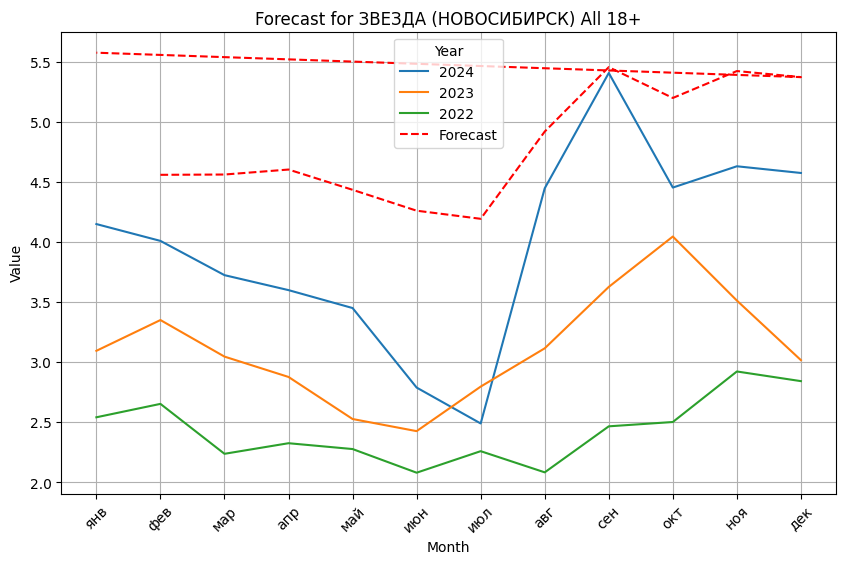

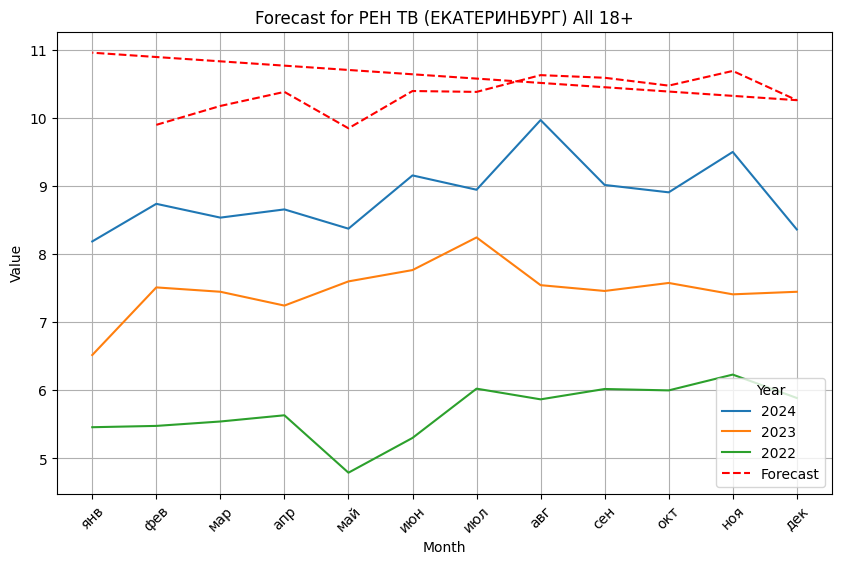

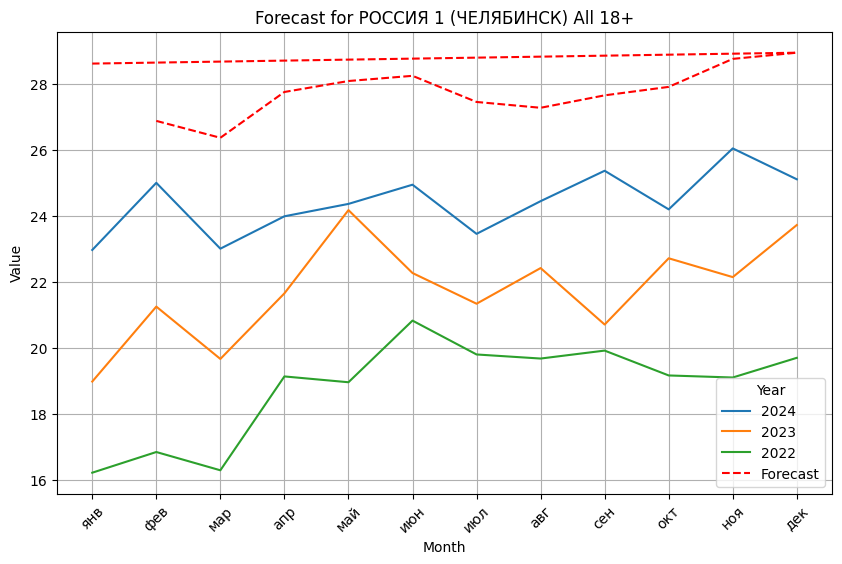

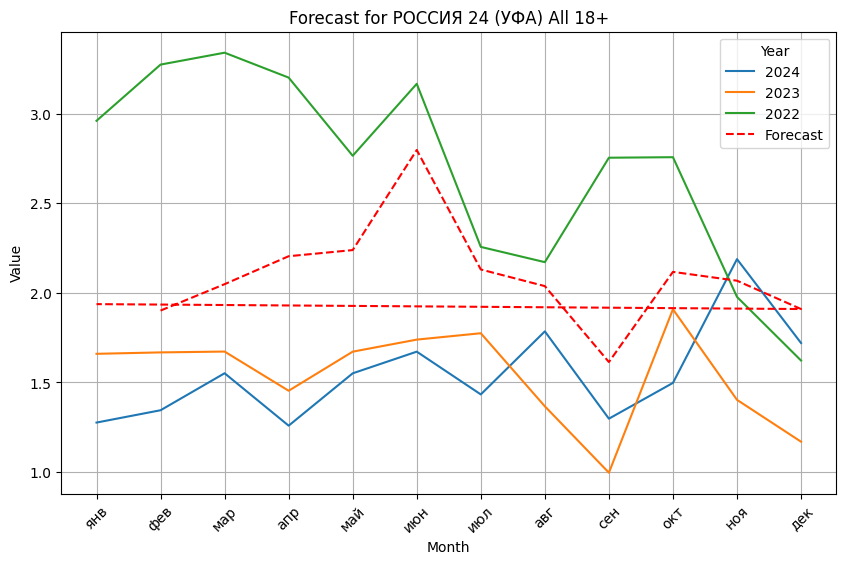

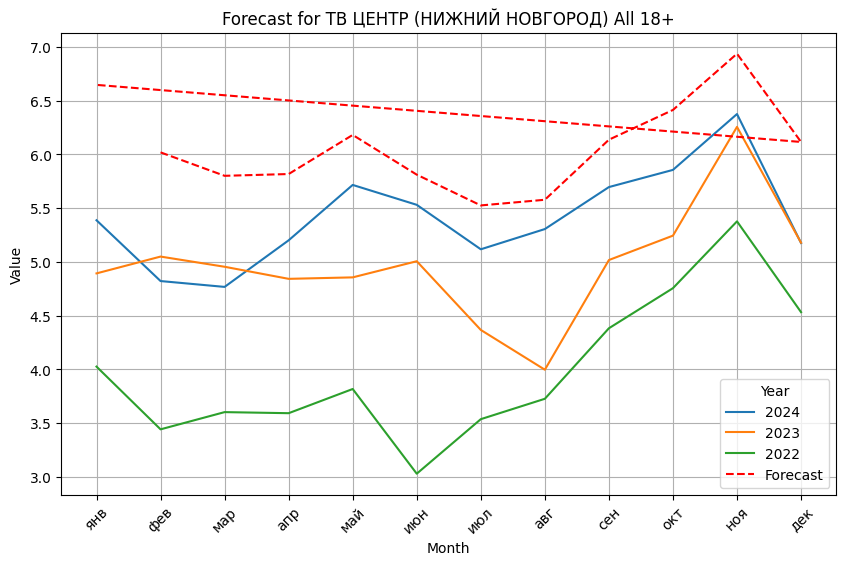

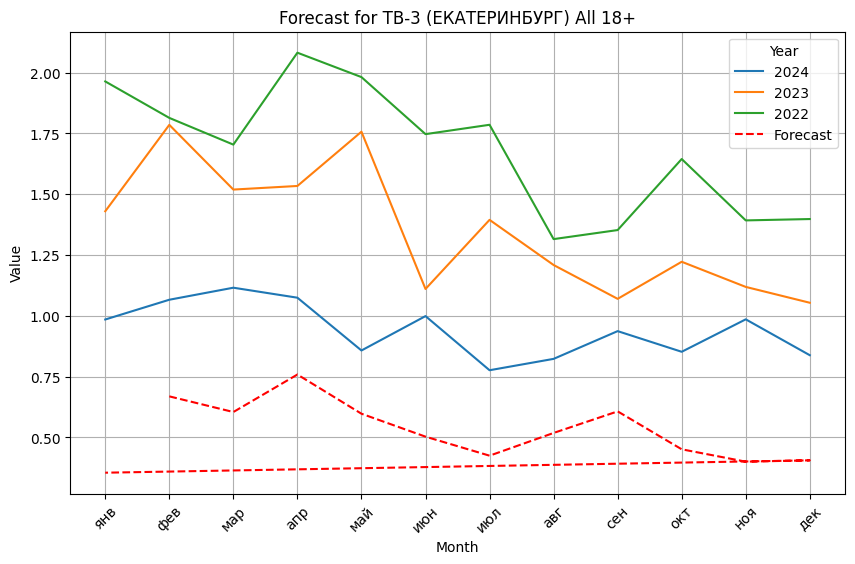

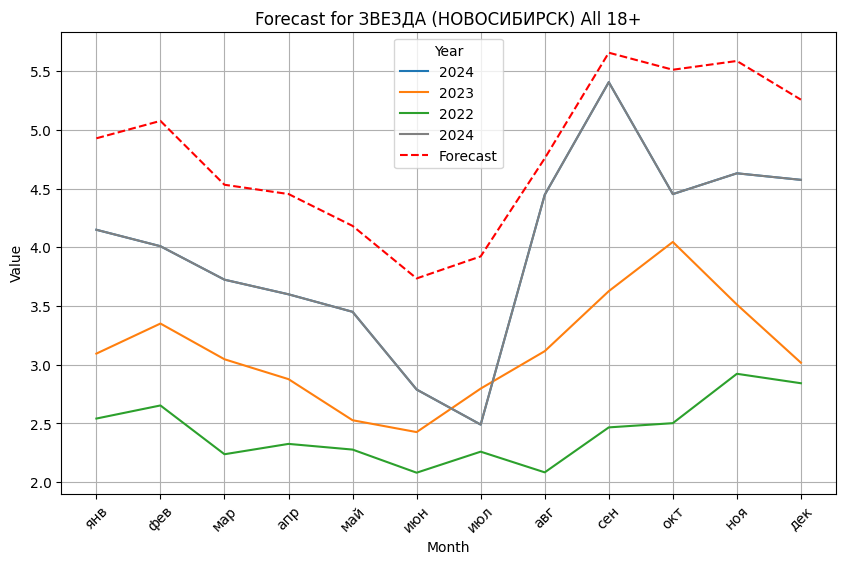

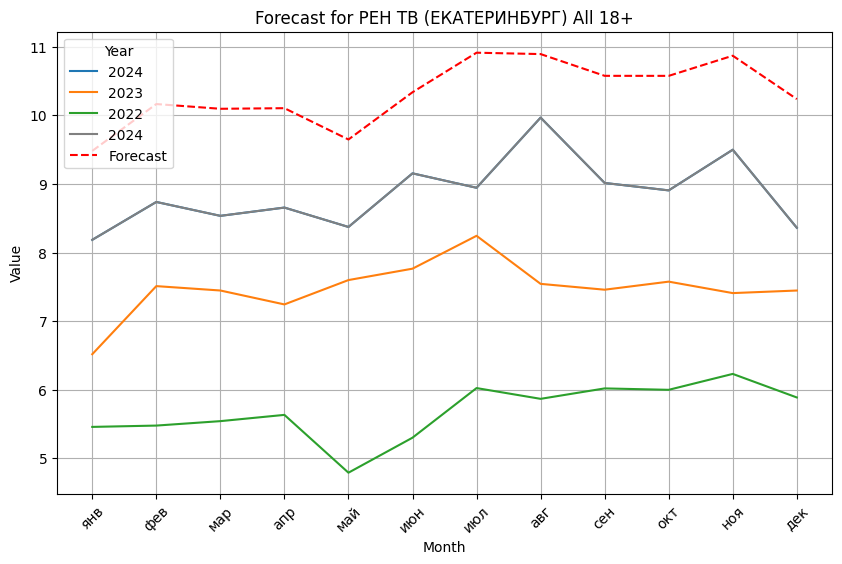

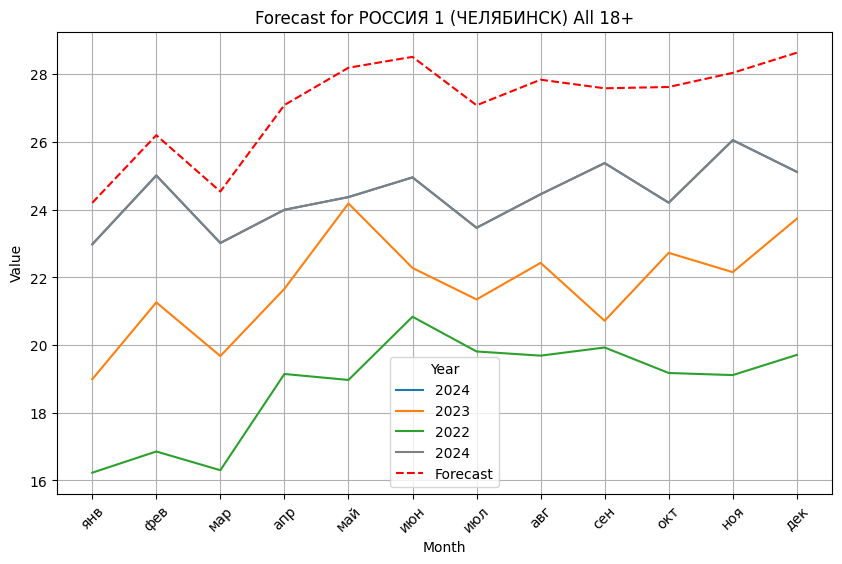

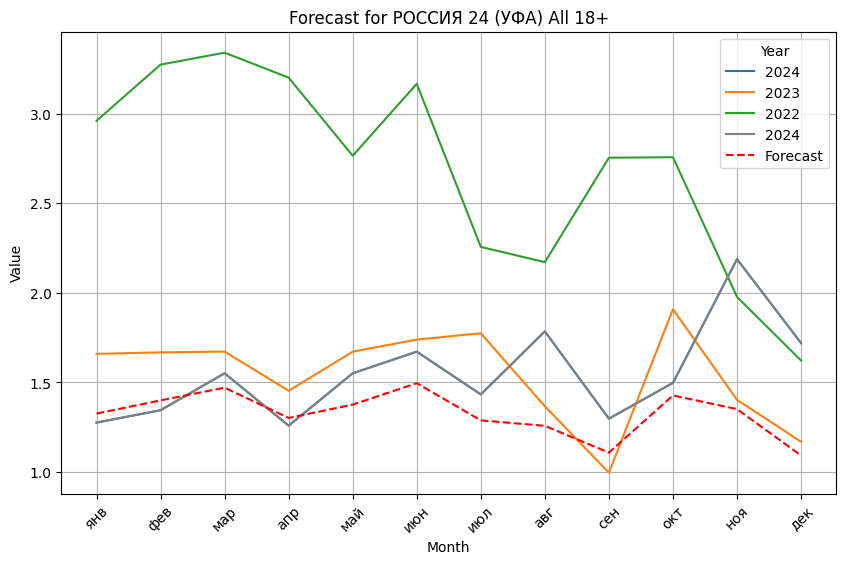

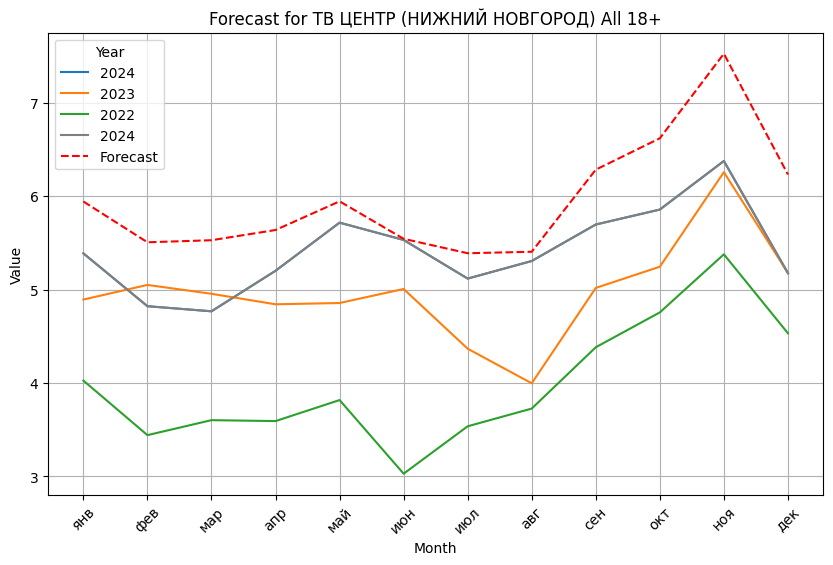

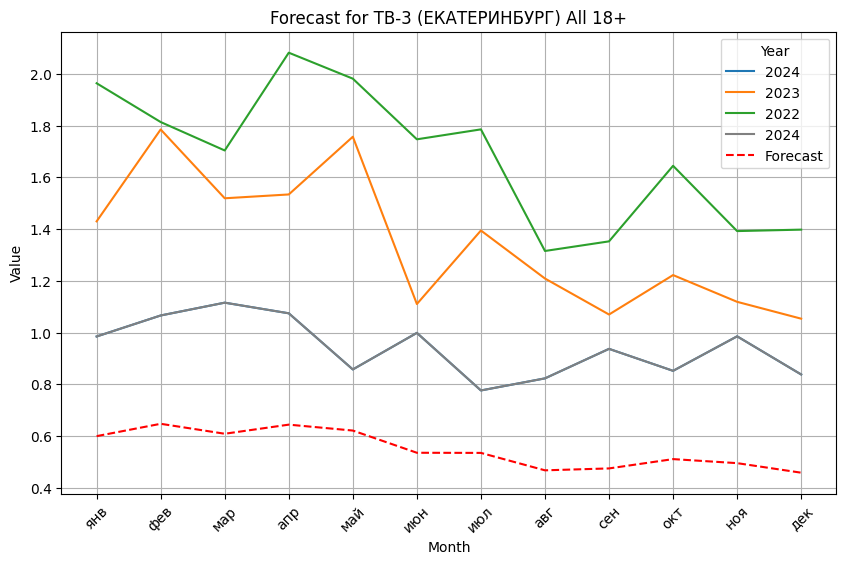

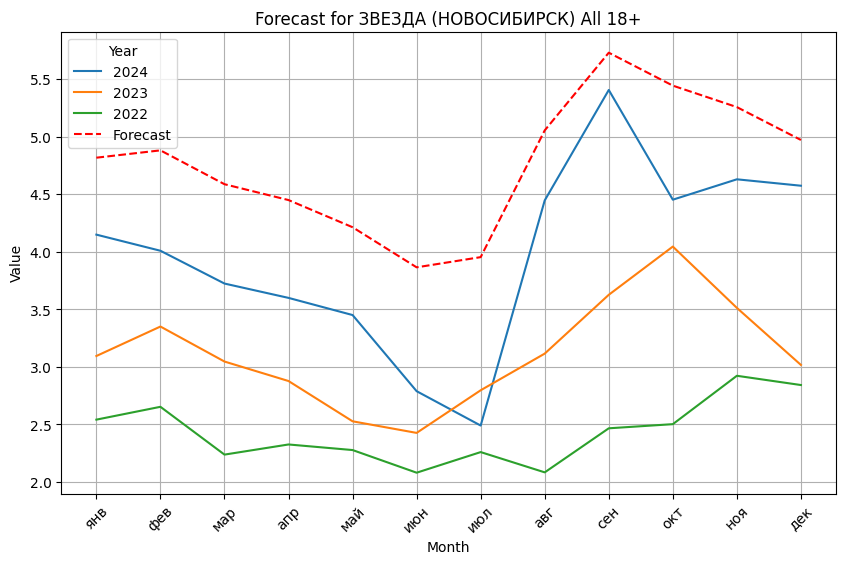

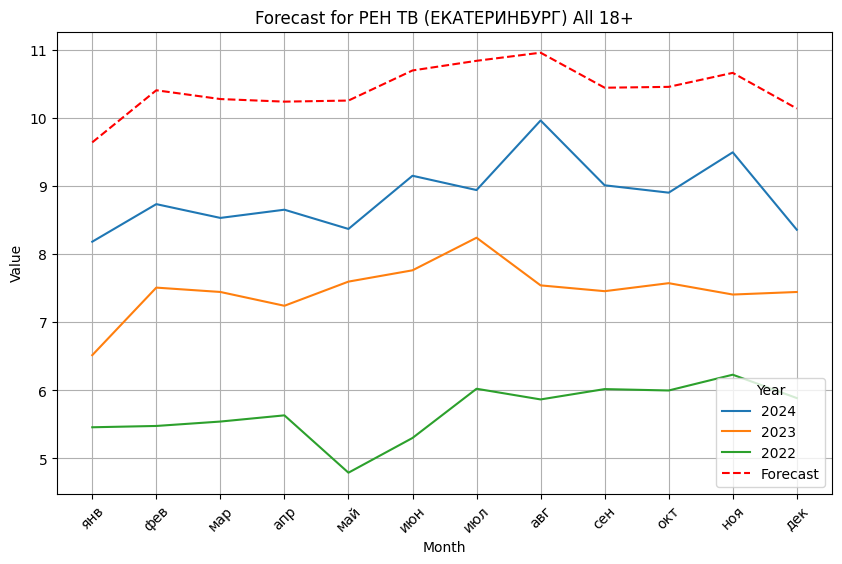

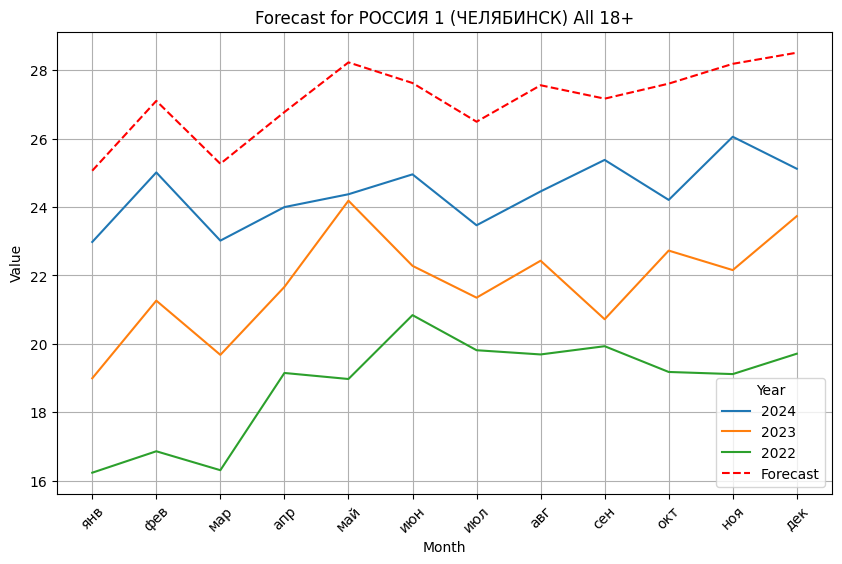

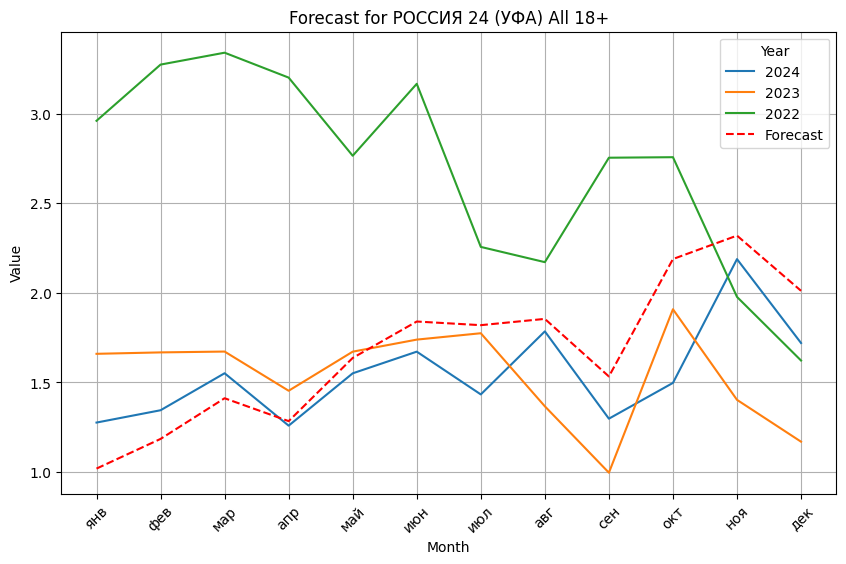

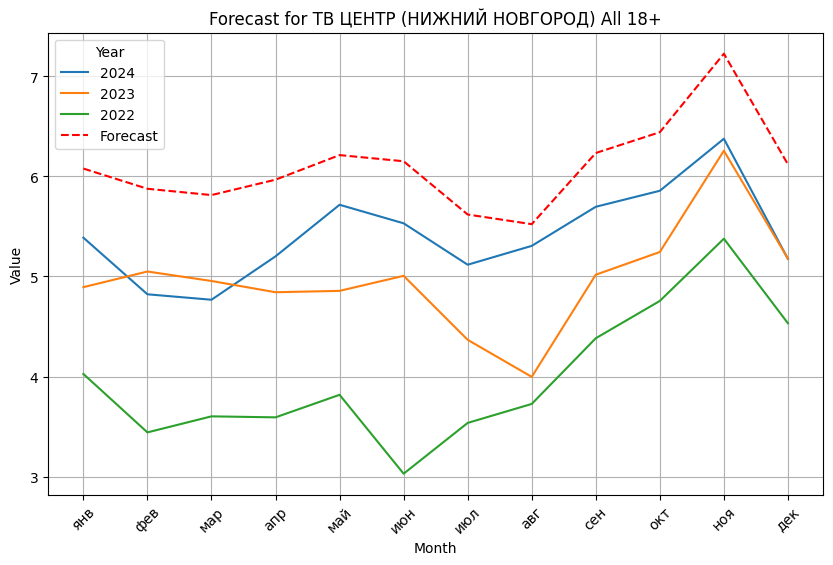

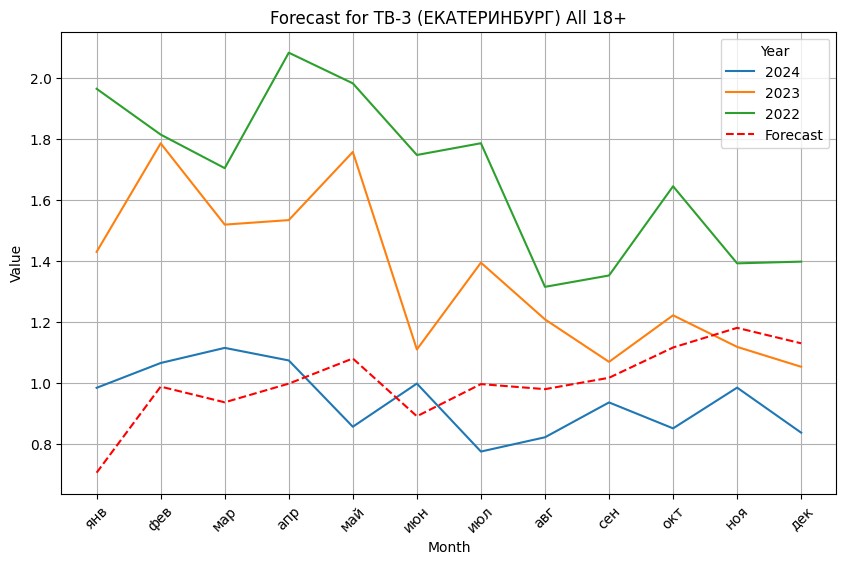

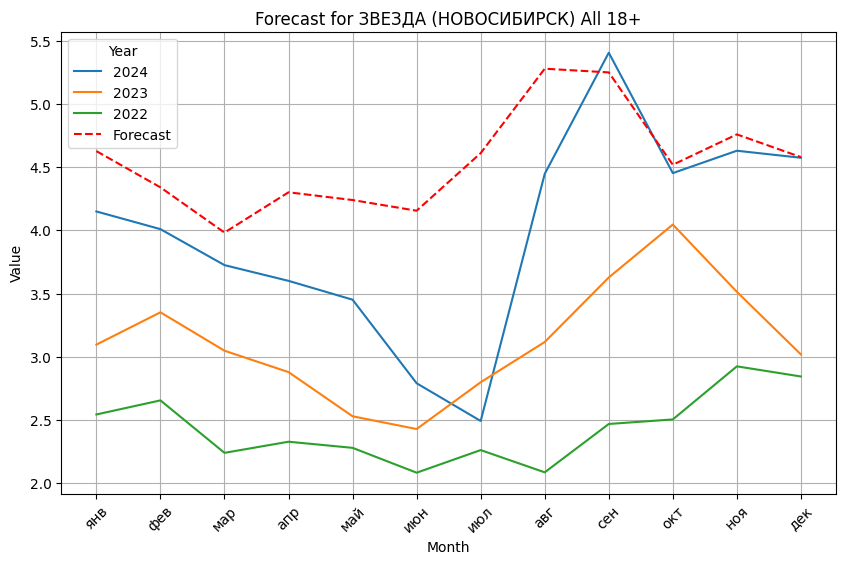

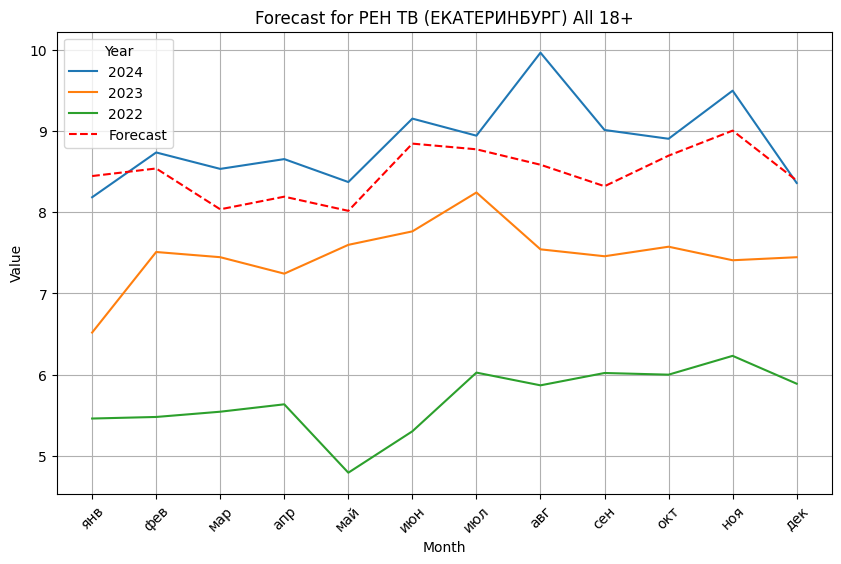

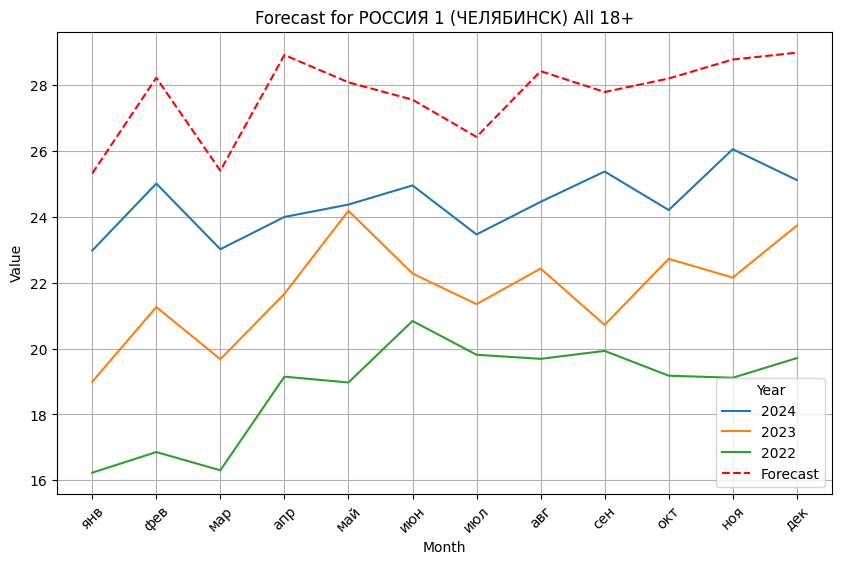

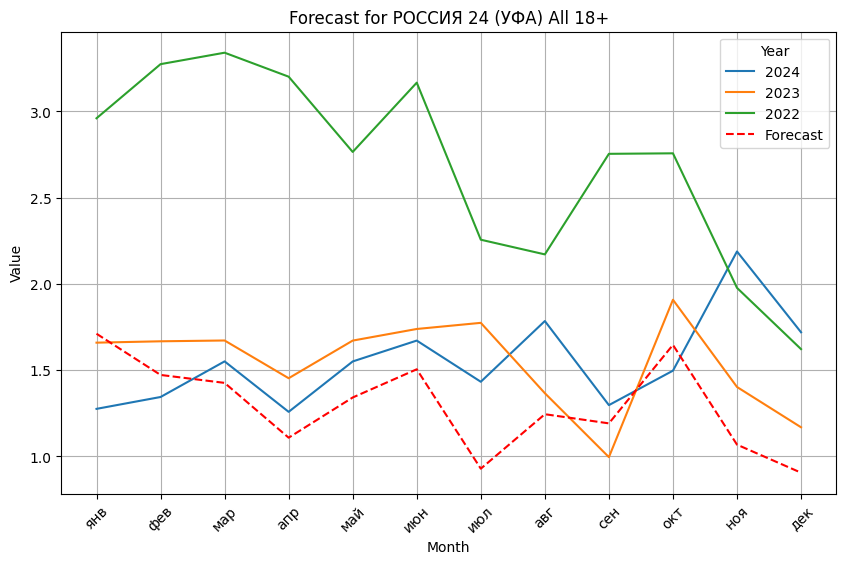

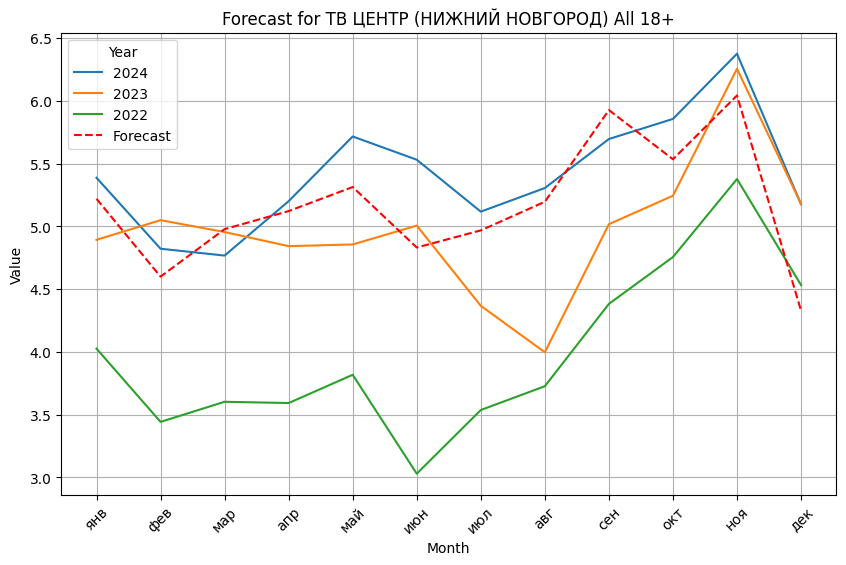

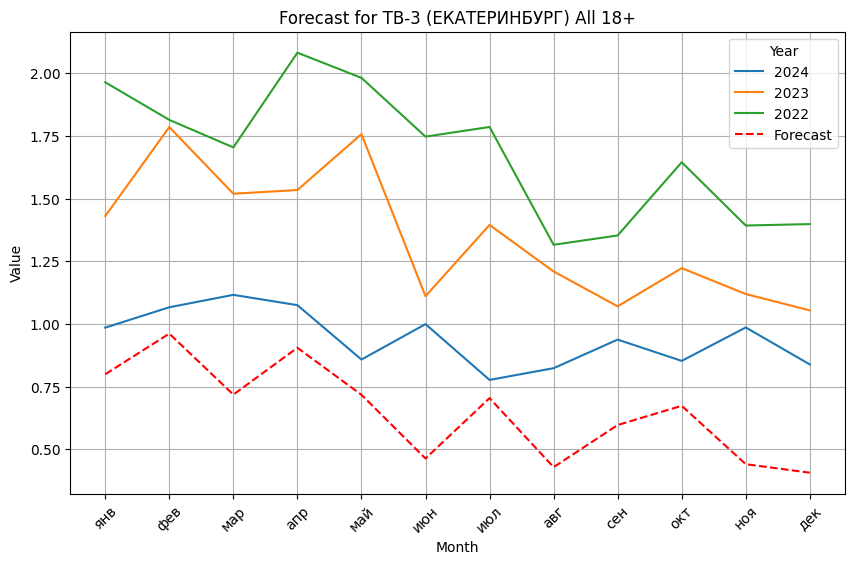

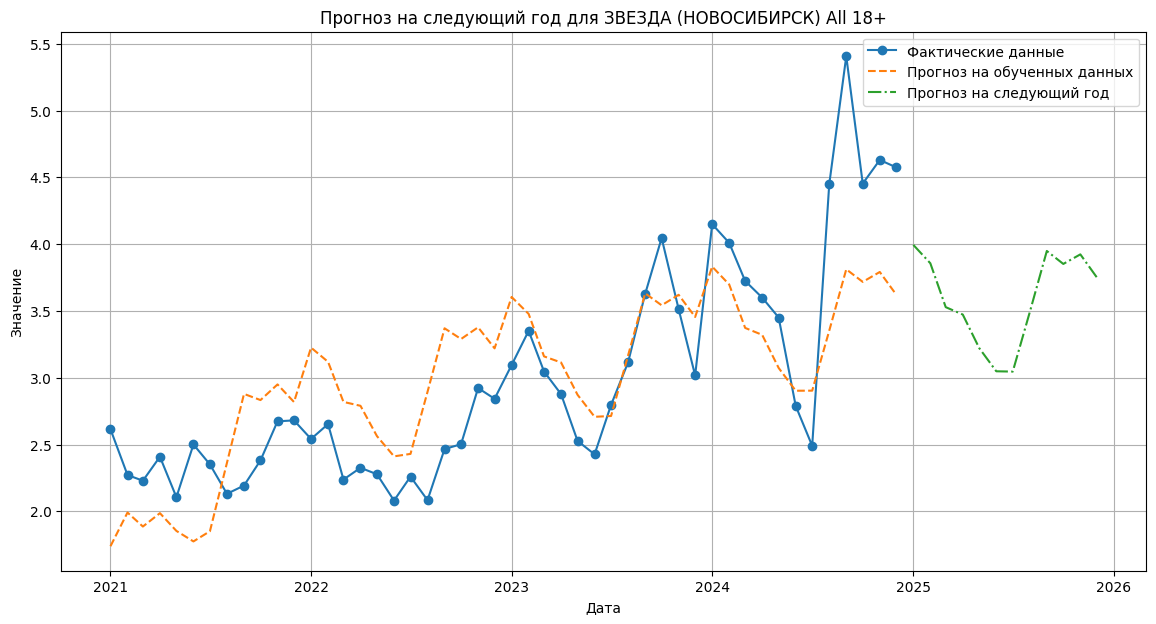

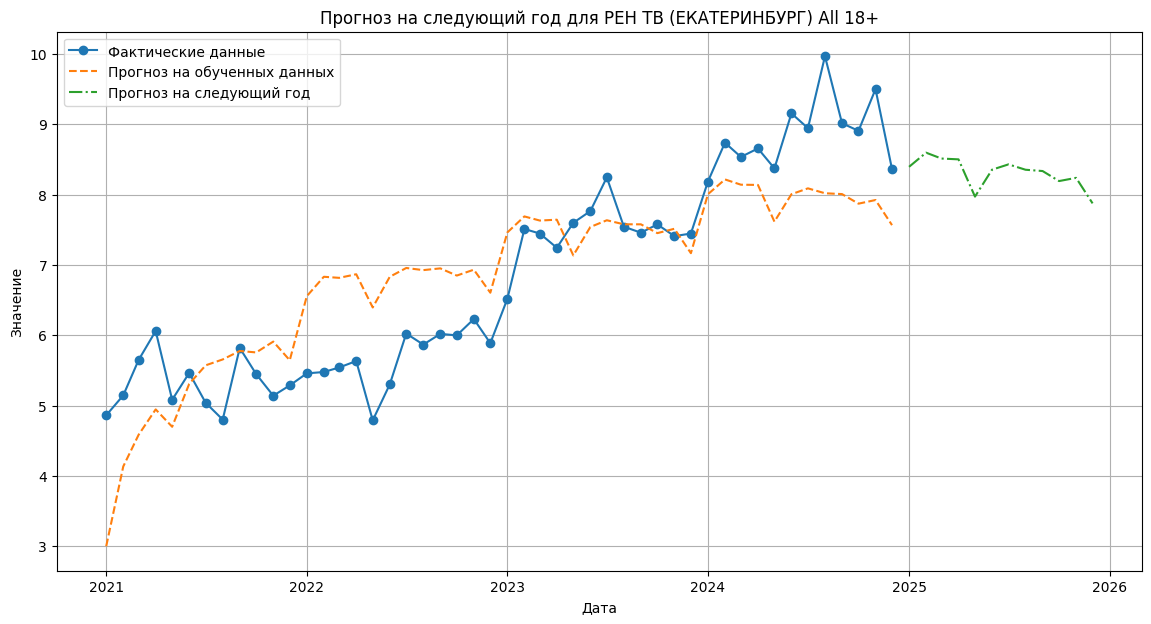

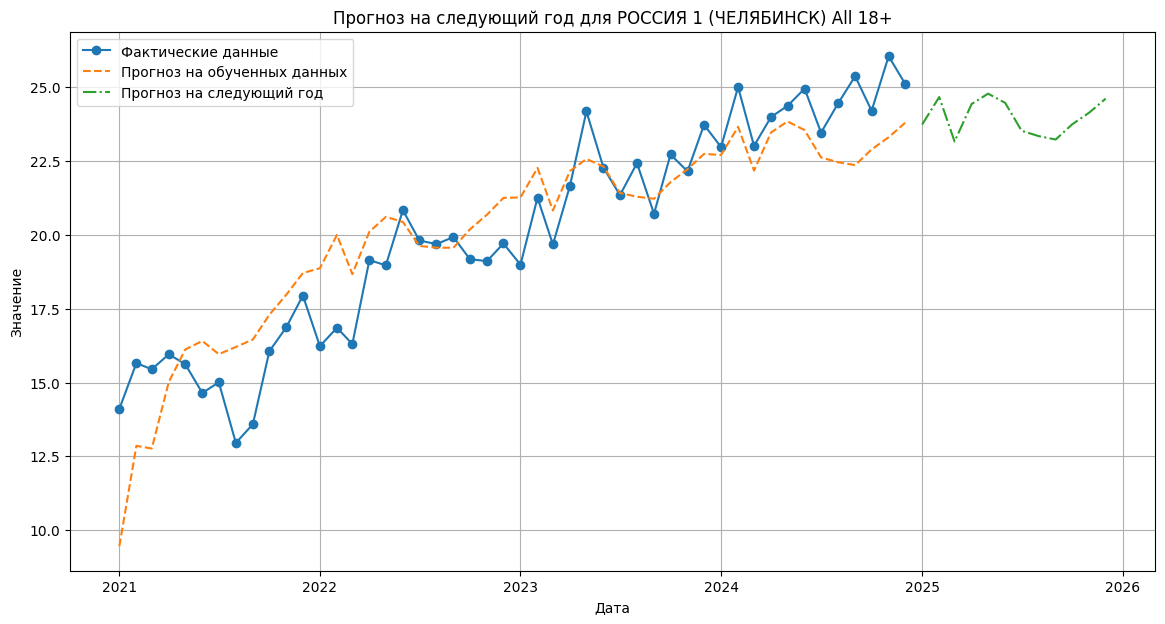

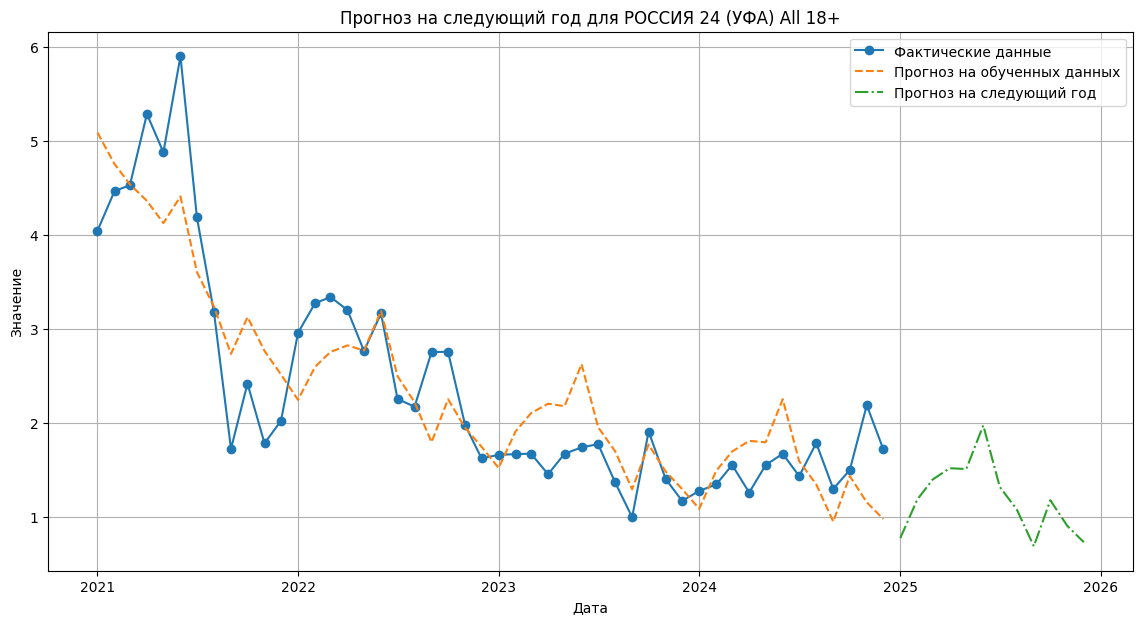

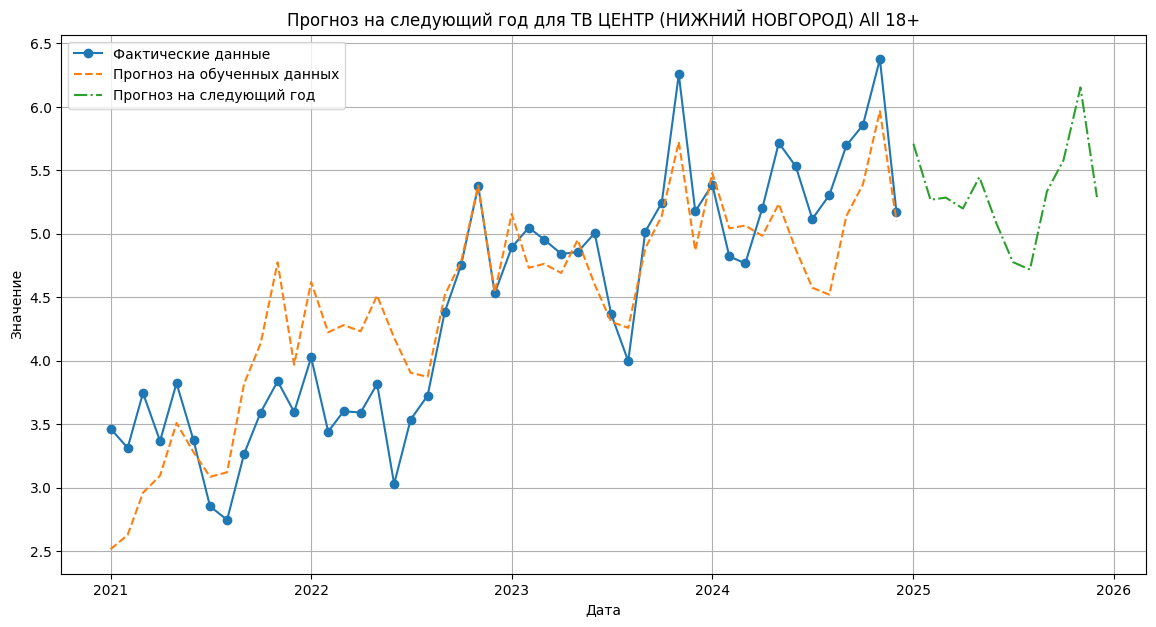

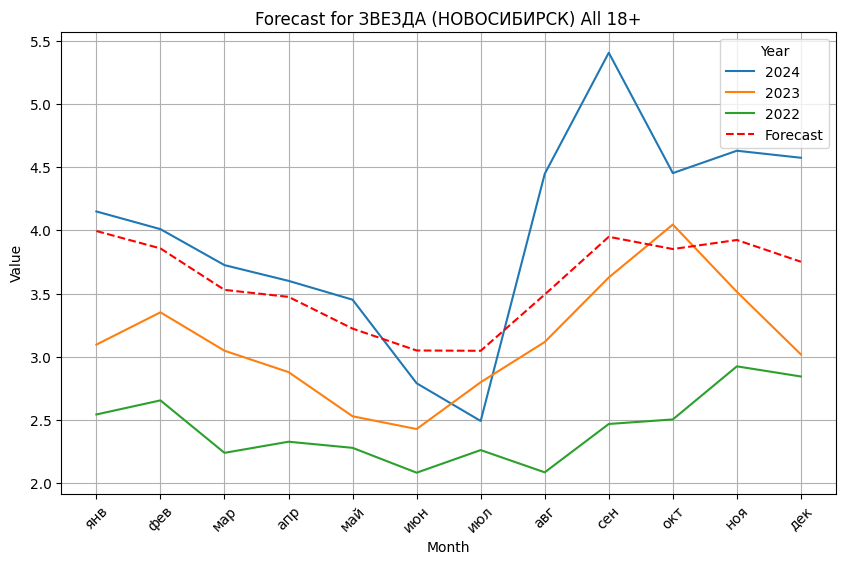

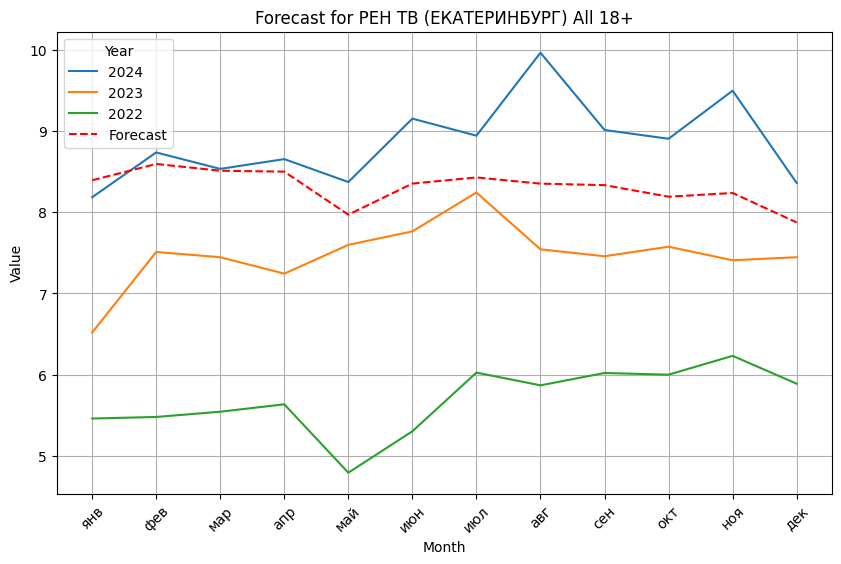

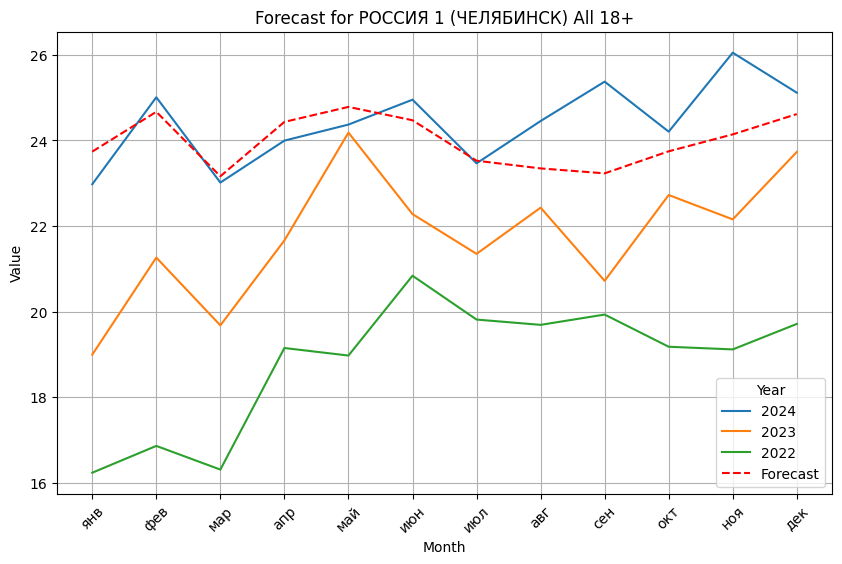

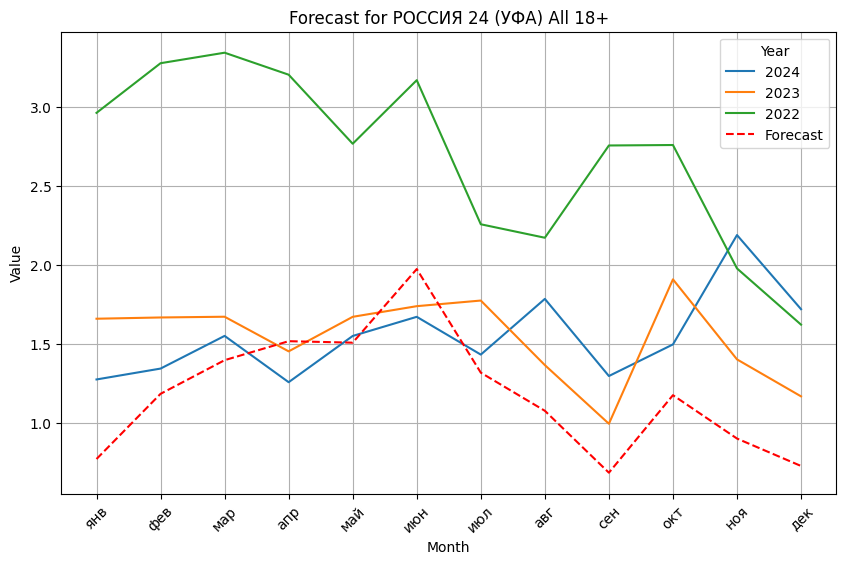

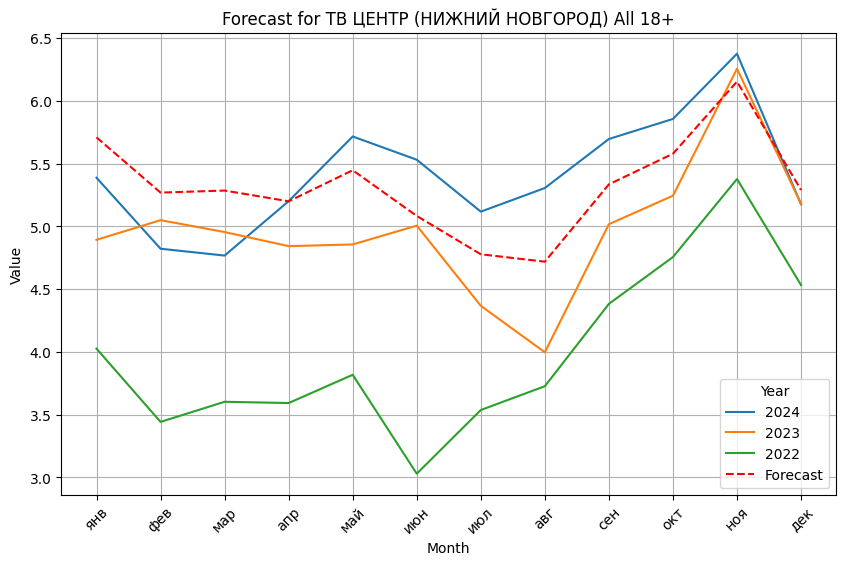

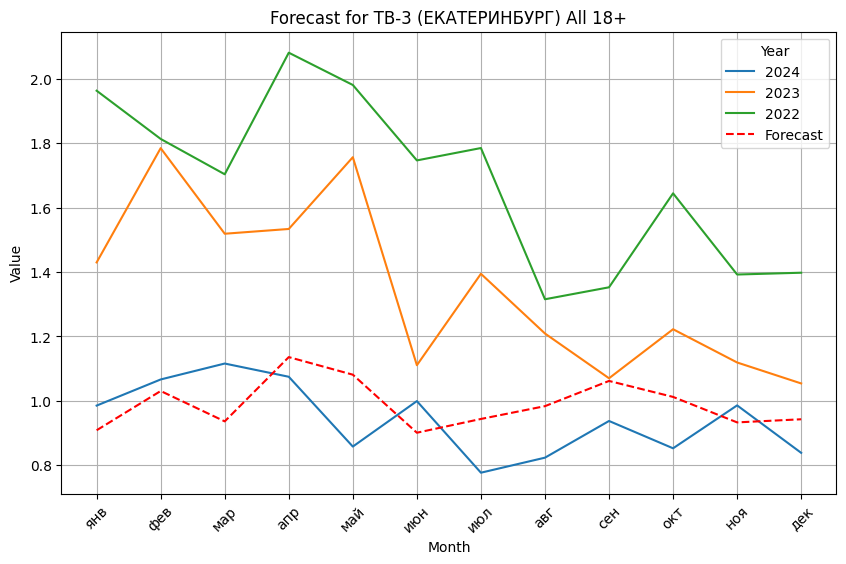

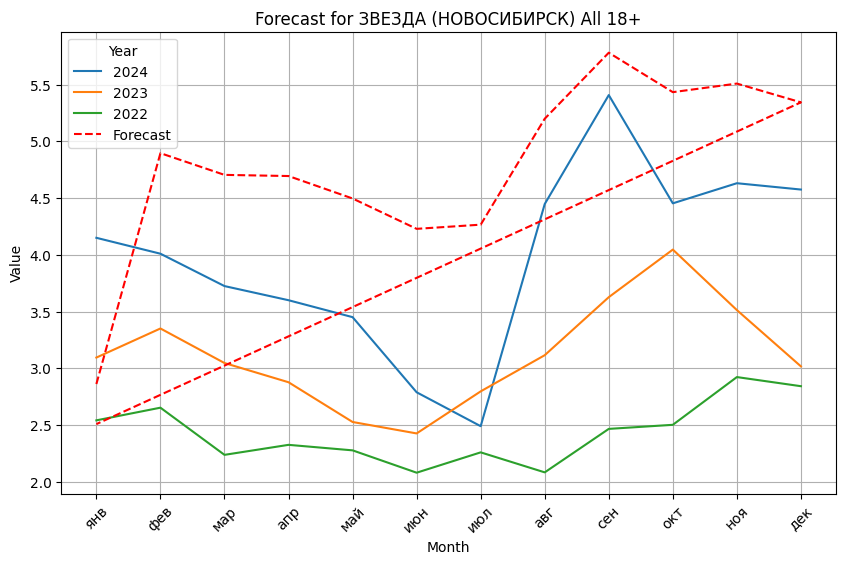

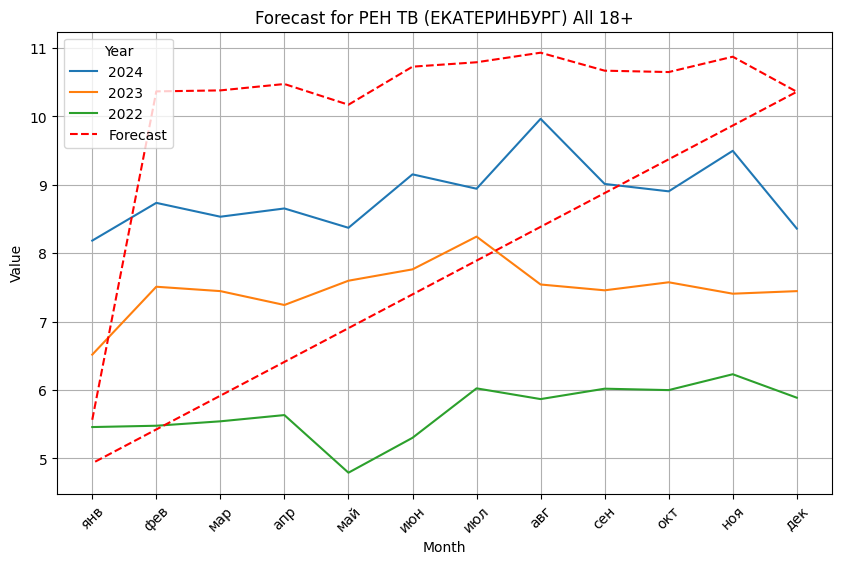

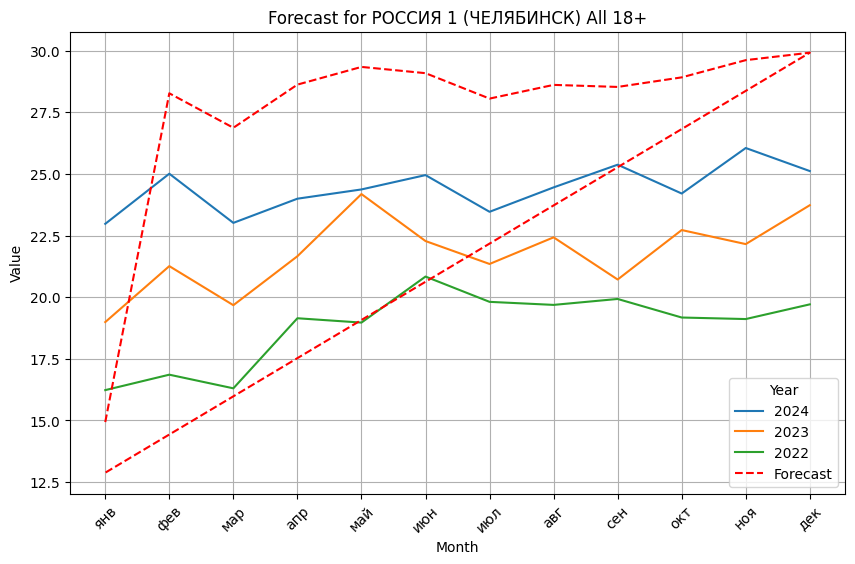

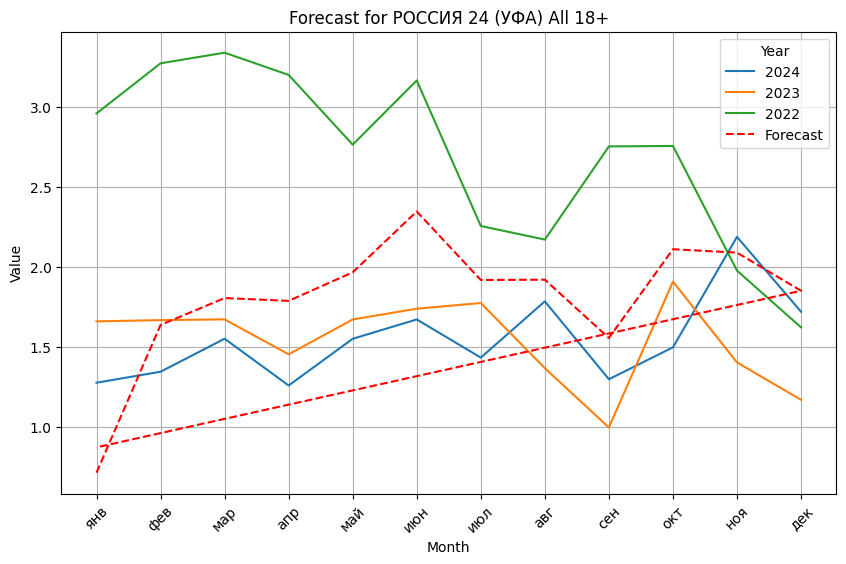

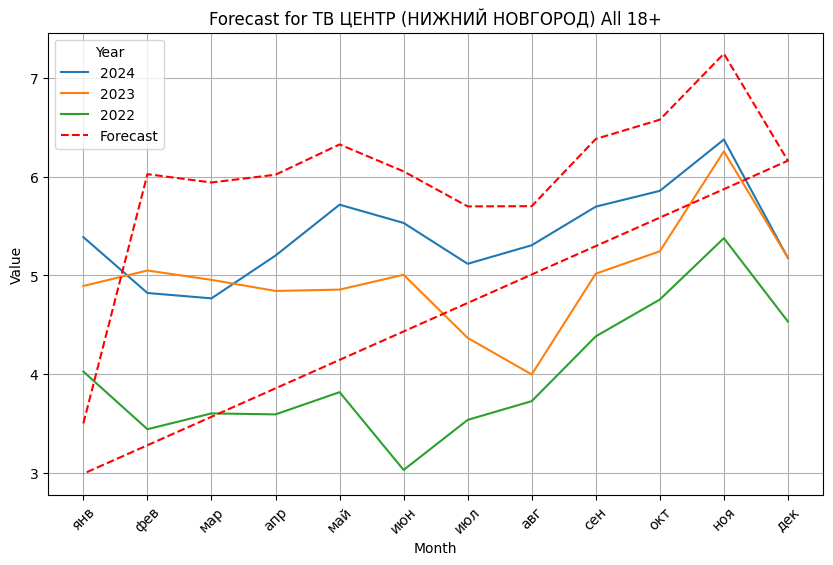

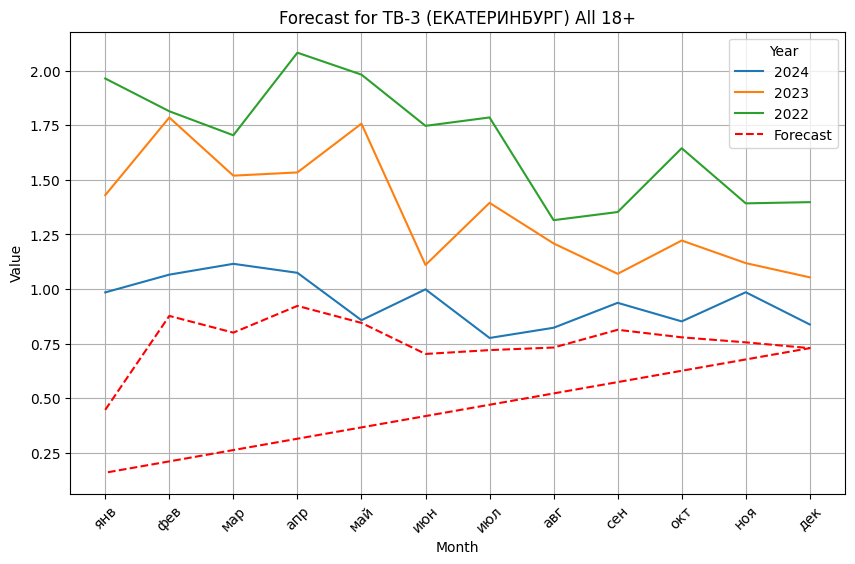

In [3]:
general_df = main('Data_by_months.xlsx')

In [4]:
df = pd.read_excel('test.xlsx', index_col = 0)

In [6]:
df.dtypes

Месяц                                  object
ДОМАШНИЙ (БАРНАУЛ) All 18+            float64
ДОМАШНИЙ (ВЛАДИВОСТОК) All 18+        float64
ДОМАШНИЙ (ВОЛГОГРАД) All 18+          float64
ДОМАШНИЙ (ВОРОНЕЖ) All 18+            float64
                                       ...   
Ю (ЕКАТЕРИНБУРГ) W 14-44              float64
Ю (НИЖНИЙ НОВГОРОД) W 14-44           float64
Ю (САНКТ-ПЕТЕРБУРГ) W 14-44           float64
ДОМАШНИЙ (ЕКАТЕРИНБУРГ) W 25-59       float64
ДОМАШНИЙ (САНКТ-ПЕТЕРБУРГ) W 25-59    float64
Length: 348, dtype: object

In [4]:
def f(*number):
    return number

In [6]:
number1 = [4]
number2 = [5]
f(*number1, *number2)

(4, 5)